<a href="https://colab.research.google.com/github/Arju-Jawla/Python-Applications-in-Climate-Variability-studies/blob/main/05_Process_uWind_(Mean_and_Std).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Process U-Wind: Mean and Std

* read 4D u-Wind data
* calculate mean and stadard deviation along the axis of time
* visualize based on the library of **basemap**

**Data**

wind data can be downlaed from https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis2.html

This u-wind is a 4D data, includding [months|levels|lat|lon]. The presure levels in hPa.

Moreover, the wind data with **scaling** and **offset**. when using them, have to restore them to oringal values.

## 1. Load Basic Libraries

In [ ]:
!pip install netCDF4

In [ ]:
!pip install basemap

In [ ]:
%matplotlib inline

from pylab import *
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # plot on map projections

from netCDF4 import Dataset as netcdf # netcdf4-python module

In [ ]:
import cftime

## 2. Read u-wind data and pick variables

### 2.1 Use print to check variable information.

Actually, you can also use numdump infile.nc -h to check the same inforamtion

In [ ]:
ncset = netcdf(r'/content/drive/MyDrive/Project Learnings/Data/uwnd.mon.mean.nc')
print(ncset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    title: Monthly NCEP/DOE Reanalysis 2
    comments: Data is from 
NCEP/DOE AMIP-II Reanalysis (Reanalysis-2)
(4x/day).  It consists of most variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    source: NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution: National Centers for Environmental Prediction
    dataset_title: NCEP-DOE AMIP-II Reanalysis
    References: https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html
    source_url: http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history: created 2002/03 by Hoop (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2020/05
    dimensions(sizes): level(17), lat(73), lon(144), time(548), nbnds(2)
    variables(dimensions): float32 level(level), float32 lat(lat), float32 lon(lon), float64 time_bnds(time, nbnds), float64 time(time), flo

1. **Format and Model:**

* File format: NetCDF4 (HDF5), with NETCDF4_CLASSIC data model.
* Features chunked and deflated storage for compression and optimization.

2. **Title and Origin:**

* Title: Monthly NCEP/DOE Reanalysis 2.
* Data source: NCEP/DOE AMIP-II Reanalysis (Reanalysis-2).
* Institution: National Centers for Environmental Prediction (NCEP).
* Created in 2002, converted to NetCDF4 in 2020.

3. **Purpose and Data Type:**

* Data consists of u-wind components interpolated to pressure surfaces (from model sigma surfaces), updated four times daily.
* It holds atmospheric data for climate reanalysis and forecasting.

4. **Dimensions and Variables:**

* Dimensions: level(17), lat(73), lon(144), time(548), nbnds(2).
* Variables: level, lat, lon, time, time_bnds, and uwnd (u-wind component).

5. **Metadata and Standards:**

* Conventions: CF-1.0 standard for climate data.
* References include links to relevant data and history pages.

6. **Temporal Coverage:**

* Contains 548 time records, indicating monthly data with time bounds (via time_bnds variable).

This dataset is part of the updated Reanalysis-2 project and is more optimized for modern usage than the original NCEP reanalysis.

### 2.2 Read Data
Have to set_auto_mask(False) to automatically scaling and offseting, or may cause problem.

In [ ]:
ncset.set_auto_mask(False)

lon = ncset['lon'][:]
lat = ncset['lat'][:]
lev = ncset['level'][:]
nctime = ncset['time'][:]
t_unit = ncset['time'].units
time_bnds = ncset.variables['time_bnds'][:]


# Try to get the calendar type from the 'calendar' attribute of the 'time' variable
try :
    t_cal = ncset['time'].calendar
# If the 'calendar' attribute doesn't exist, set 't_cal' to 'gregorian'
except AttributeError : # Attribute doesn't exist
    t_cal = u"gregorian" # or standard

In [ ]:
uwnd = ncset['uwnd'][:]

## 3. Know more about the data & variables

**LONGITUDE DATA**

In [ ]:
print("Longitudes are\n:", lon)

Longitudes are
: [  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90.   92.5  95.   97.5 100.  102.5 105.  107.5 110.  112.5 115.  117.5
 120.  122.5 125.  127.5 130.  132.5 135.  137.5 140.  142.5 145.  147.5
 150.  152.5 155.  157.5 160.  162.5 165.  167.5 170.  172.5 175.  177.5
 180.  182.5 185.  187.5 190.  192.5 195.  197.5 200.  202.5 205.  207.5
 210.  212.5 215.  217.5 220.  222.5 225.  227.5 230.  232.5 235.  237.5
 240.  242.5 245.  247.5 250.  252.5 255.  257.5 260.  262.5 265.  267.5
 270.  272.5 275.  277.5 280.  282.5 285.  287.5 290.  292.5 295.  297.5
 300.  302.5 305.  307.5 310.  312.5 315.  317.5 320.  322.5 325.  327.5
 330.  332.5 335.  337.5 340.  342.5 345.  347.5 350.  352.5 355.  357.5]


In [ ]:
print("shape of the longitude data:")
lon.shape

shape of the longitude data:


(144,)

**SUMMARY**
* Range: 0° to 357.5° (with an interval of 2.5°).
* Shape: (144,)
* This represents 144 evenly spaced longitudes across the globe from 0° to nearly 360°.

**LATITUDE DATA**

In [ ]:
print("Latitudes are\n:", lat)

Latitudes are
: [ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5  65.   62.5
  60.   57.5  55.   52.5  50.   47.5  45.   42.5  40.   37.5  35.   32.5
  30.   27.5  25.   22.5  20.   17.5  15.   12.5  10.    7.5   5.    2.5
   0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5
 -30.  -32.5 -35.  -37.5 -40.  -42.5 -45.  -47.5 -50.  -52.5 -55.  -57.5
 -60.  -62.5 -65.  -67.5 -70.  -72.5 -75.  -77.5 -80.  -82.5 -85.  -87.5
 -90. ]


In [ ]:
print("shape of the latitude data:")
lat.shape

shape of the latitude data:


(73,)

**SUMMARY**
* Range: 90° (North Pole) to -90° (South Pole), with intervals of 2.5°.
* Shape: (73,)
* This represents 73 evenly spaced latitudes, covering the entire globe from the North Pole to the South Pole.

**TIME**

In [ ]:
print("Time is\n:", nctime)

Time is
: [1569072. 1569816. 1570488. 1571232. 1571952. 1572696. 1573416. 1574160.
 1574904. 1575624. 1576368. 1577088. 1577832. 1578576. 1579272. 1580016.
 1580736. 1581480. 1582200. 1582944. 1583688. 1584408. 1585152. 1585872.
 1586616. 1587360. 1588032. 1588776. 1589496. 1590240. 1590960. 1591704.
 1592448. 1593168. 1593912. 1594632. 1595376. 1596120. 1596792. 1597536.
 1598256. 1599000. 1599720. 1600464. 1601208. 1601928. 1602672. 1603392.
 1604136. 1604880. 1605552. 1606296. 1607016. 1607760. 1608480. 1609224.
 1609968. 1610688. 1611432. 1612152. 1612896. 1613640. 1614336. 1615080.
 1615800. 1616544. 1617264. 1618008. 1618752. 1619472. 1620216. 1620936.
 1621680. 1622424. 1623096. 1623840. 1624560. 1625304. 1626024. 1626768.
 1627512. 1628232. 1628976. 1629696. 1630440. 1631184. 1631856. 1632600.
 1633320. 1634064. 1634784. 1635528. 1636272. 1636992. 1637736. 1638456.
 1639200. 1639944. 1640616. 1641360. 1642080. 1642824. 1643544. 1644288.
 1645032. 1645752. 1646496. 1647216. 1647

In [ ]:
print("shape of the time data:")
nctime.shape

shape of the time data:


(548,)

In [ ]:
print("units associated with time variable\n:", t_unit)

units associated with time variable
: hours since 1800-1-1 00:00:00


In [ ]:
from netCDF4 import num2date

dates = num2date(nctime, units=t_unit, calendar=t_cal)

# Print the converted dates
print(dates)

[cftime.DatetimeGregorian(1979, 1, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 2, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 3, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 4, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 5, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 6, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 7, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 8, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 9, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 10, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 11, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 12, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1980, 1, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1980, 2, 1, 0, 0, 0, 0, has_year_zero=False)
 cf

In [ ]:
#converting to more readable format
for date in dates:
  formatted_date = date.strftime('%Y-%m-%d %H:%M:%S')
  print(formatted_date)

1979-01-01 00:00:00
1979-02-01 00:00:00
1979-03-01 00:00:00
1979-04-01 00:00:00
1979-05-01 00:00:00
1979-06-01 00:00:00
1979-07-01 00:00:00
1979-08-01 00:00:00
1979-09-01 00:00:00
1979-10-01 00:00:00
1979-11-01 00:00:00
1979-12-01 00:00:00
1980-01-01 00:00:00
1980-02-01 00:00:00
1980-03-01 00:00:00
1980-04-01 00:00:00
1980-05-01 00:00:00
1980-06-01 00:00:00
1980-07-01 00:00:00
1980-08-01 00:00:00
1980-09-01 00:00:00
1980-10-01 00:00:00
1980-11-01 00:00:00
1980-12-01 00:00:00
1981-01-01 00:00:00
1981-02-01 00:00:00
1981-03-01 00:00:00
1981-04-01 00:00:00
1981-05-01 00:00:00
1981-06-01 00:00:00
1981-07-01 00:00:00
1981-08-01 00:00:00
1981-09-01 00:00:00
1981-10-01 00:00:00
1981-11-01 00:00:00
1981-12-01 00:00:00
1982-01-01 00:00:00
1982-02-01 00:00:00
1982-03-01 00:00:00
1982-04-01 00:00:00
1982-05-01 00:00:00
1982-06-01 00:00:00
1982-07-01 00:00:00
1982-08-01 00:00:00
1982-09-01 00:00:00
1982-10-01 00:00:00
1982-11-01 00:00:00
1982-12-01 00:00:00
1983-01-01 00:00:00
1983-02-01 00:00:00


**SUMMARY**
*  Range: January 1, 1979, to August 1, 2024.
* Monthly Intervals: Data is recorded at the start of each month.
* Temporal Coverage: 548 monthly time steps from January 1979 to August 2024.

**TIME-BOUNDS**

In [ ]:
print("Time bounds are\n:", time_bnds)

Time bounds are
: [[1569072. 1569816.]
 [1569816. 1570488.]
 [1570488. 1571232.]
 ...
 [1967184. 1967904.]
 [1967904. 1968648.]
 [1968648. 1969392.]]


In [ ]:
print("shape of the time bounds data:")
time_bnds.shape

shape of the time bounds data:


(548, 2)

In [ ]:
print("data type of the time bounds data")
time_bnds.dtype

data type of the time bounds data


dtype('float64')

In [ ]:
#Converting to more readble format
for bounds in time_bnds:
  start_date = num2date(bounds[0], units=t_unit, calendar=t_cal)
  end_date = num2date(bounds[1], units=t_unit, calendar=t_cal)

  formatted_start_date = start_date.strftime('%Y-%m-%d %H:%M:%S')
  formatted_end_date = end_date.strftime('%Y-%m-%d %H:%M:%S')

  print(f"Start: {formatted_start_date}, End: {formatted_end_date}")

Start: 1979-01-01 00:00:00, End: 1979-02-01 00:00:00
Start: 1979-02-01 00:00:00, End: 1979-03-01 00:00:00
Start: 1979-03-01 00:00:00, End: 1979-04-01 00:00:00
Start: 1979-04-01 00:00:00, End: 1979-05-01 00:00:00
Start: 1979-05-01 00:00:00, End: 1979-06-01 00:00:00
Start: 1979-06-01 00:00:00, End: 1979-07-01 00:00:00
Start: 1979-07-01 00:00:00, End: 1979-08-01 00:00:00
Start: 1979-08-01 00:00:00, End: 1979-09-01 00:00:00
Start: 1979-09-01 00:00:00, End: 1979-10-01 00:00:00
Start: 1979-10-01 00:00:00, End: 1979-11-01 00:00:00
Start: 1979-11-01 00:00:00, End: 1979-12-01 00:00:00
Start: 1979-12-01 00:00:00, End: 1980-01-01 00:00:00
Start: 1980-01-01 00:00:00, End: 1980-02-01 00:00:00
Start: 1980-02-01 00:00:00, End: 1980-03-01 00:00:00
Start: 1980-03-01 00:00:00, End: 1980-04-01 00:00:00
Start: 1980-04-01 00:00:00, End: 1980-05-01 00:00:00
Start: 1980-05-01 00:00:00, End: 1980-06-01 00:00:00
Start: 1980-06-01 00:00:00, End: 1980-07-01 00:00:00
Start: 1980-07-01 00:00:00, End: 1980-08-01 00

**SUMMARY**
* Each time step spans one month, with the start time of one month and the end time set to the start of the next month.
* Example: Time bound for January 1979 is from 1979-01-01 00:00:00 to 1979-02-01 00:00:00.
* This continues through the dataset, with the final time bound being from August 1, 2024, to September 1, 2024.

**UWIND**

In [ ]:
print("uwind values are\n:", uwnd)

uwind values are
: [[[[-1.25999451e+00 -1.32000732e+00 -1.36999512e+00 ... -1.08000183e+00
    -1.13999939e+00 -1.19999695e+00]
   [-1.86999512e+00 -1.91000366e+00 -1.94000244e+00 ... -1.68000793e+00
    -1.75999451e+00 -1.82000732e+00]
   [-1.33000183e+00 -1.36000061e+00 -1.36000061e+00 ... -1.11000061e+00
    -1.21000671e+00 -1.27999878e+00]
   ...
   [-1.19995117e-01  8.99963379e-02  3.09997559e-01 ... -7.20001221e-01
    -5.40008545e-01 -3.30001831e-01]
   [-5.89996338e-01 -4.10003662e-01 -2.20001221e-01 ... -1.08999634e+00
    -9.30007935e-01 -7.59994507e-01]
   [ 3.09997559e-01  5.09994507e-01  6.90002441e-01 ... -2.59994507e-01
    -7.00073242e-02  1.19995117e-01]]

  [[-1.77000427e+00 -1.83999634e+00 -1.91000366e+00 ... -1.54000854e+00
    -1.61999512e+00 -1.69999695e+00]
   [-2.40000916e+00 -2.43000793e+00 -2.46000671e+00 ... -2.22000122e+00
    -2.29000854e+00 -2.35000610e+00]
   [-1.46000671e+00 -1.49000549e+00 -1.49000549e+00 ... -1.29000854e+00
    -1.36000061e+00 -1.41999

In [ ]:
print("shape of the uwind data:")
uwnd.shape

shape of the uwind data:


(548, 17, 73, 144)

**SUMMARY**

**Shape:** (548, 17, 73, 144)
* 548 time steps (monthly data from 1979 to 2024).
* 17 levels (vertical pressure levels in the atmosphere).
* 73 latitudes (from 90°N to 90°S).
* 144 longitudes (from 0° to 360°).

**Values:**
* uwnd represents the u-component of wind (east-west wind), with values in units of wind speed.
* The data contains 4D arrays representing wind speed at various times, pressure levels, latitudes, and longitudes.
* Values range from negative (westward winds) to positive (eastward winds).

In [ ]:
# Convert the 'nctime' array to actual dates
dates = num2date(nctime, units=t_unit, calendar=t_cal)

In [ ]:
# Define the start and end date for the period 1990-01-01 to 1999-12-31
start_date = cftime.DatetimeGregorian(1990, 1, 1, 0, 0, 0)  # Using cftime
end_date = cftime.DatetimeGregorian(1999, 12, 31, 0, 0, 0)

In [ ]:
# Find the indices where the dates fall within the 1990-1999 range
indices = np.where((dates >= start_date) & (dates <= end_date))[0]

In [ ]:
# Print the first and last index
print(f"Start index: {indices[0]}")
print(f"End index: {indices[-1]}")

Start index: 132
End index: 251


In [ ]:
# Now extract uwind data for this period
u = ncset['uwnd'][indices, :, :, :]  # Extract uwind from 1990-01 to 1999-12

In [ ]:
print(u.shape)

(120, 17, 73, 144)


In [ ]:
print(lev)

[1000.  925.  850.  700.  600.  500.  400.  300.  250.  200.  150.  100.
   70.   50.   30.   20.   10.]


### 3.2 Have a quick shot on first grid

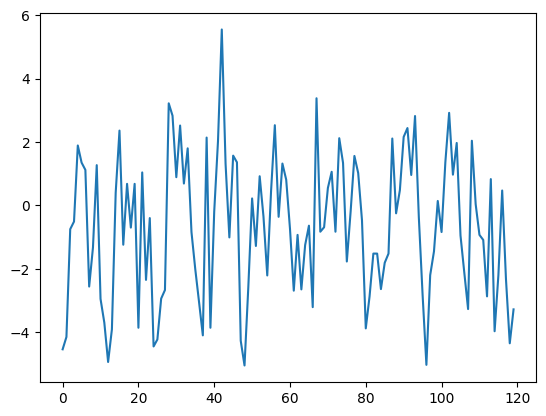

In [ ]:
plot(u[:,1,0, 0])

## 4. Calculate Mean and STD in time

### 4.1 Mean

In [ ]:
u_10y = np.mean(u, axis=0) # calculate mean for all years and months
u_10y.shape

(17, 73, 144)

In [ ]:
print("mean wind is:\n", u_10y[0])

mean wind is:
 [[-0.7522522  -0.7706687  -0.78533477 ... -0.69233537 -0.713585
  -0.73383546]
 [-0.3892516  -0.42425206 -0.45675138 ... -0.2655009  -0.3089189
  -0.35058543]
 [-0.06266861 -0.15033518 -0.2217514  ...  0.28741443  0.15858154
   0.03966497]
 ...
 [-5.492835   -5.076251   -4.655919   ... -6.7025857  -6.311168
  -5.9067507 ]
 [-4.8930845  -4.505502   -4.108669   ... -5.98442    -5.633669
  -5.2693357 ]
 [-0.24033521  0.13433139  0.50991505 ... -1.3603351  -0.9884186
  -0.615169  ]]


### 4.2 STD

In [ ]:
u_10y_std=np.std(u, axis=0)
u_10y_std.shape

(17, 73, 144)

In [ ]:
print("std wind is:\n", u_10y_std[0])

std wind is:
 [[2.1206717 2.1042953 2.0851328 ... 2.170545  2.154377  2.1374402]
 [2.283333  2.274015  2.266848  ... 2.3127034 2.3031857 2.292645 ]
 [2.1812415 2.2086287 2.2368646 ... 2.121179  2.1368809 2.157925 ]
 ...
 [2.009765  1.9429072 1.8752991 ... 2.1989121 2.1385546 2.0752923]
 [1.7076399 1.6649569 1.6219971 ... 1.8350438 1.7936399 1.7505171]
 [1.4317877 1.4309982 1.43298   ... 1.4524604 1.4424808 1.435721 ]]


### 4.3 Visualize Mean and STD at 1000hPa (the first level)

In [ ]:
print(f"Shape of lons: {lons.shape}")
print(f"Shape of lats: {lats.shape}")
print(f"Shape of u_10y[0]: {u_10y[0].shape}")

Shape of lons: (73, 144)
Shape of lats: (73, 144)
Shape of u_10y[0]: (73, 144)


<ipython-input-106-30ce619b846b>:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  h = m.pcolormesh(lons, lats, u_10y[0], shading='auto',latlon=True, cmap='jet', vmin=minu, vmax=maxu)


Text(0.5, 1.0, 'U1000 Mean between 1990-1999 [m/s]')

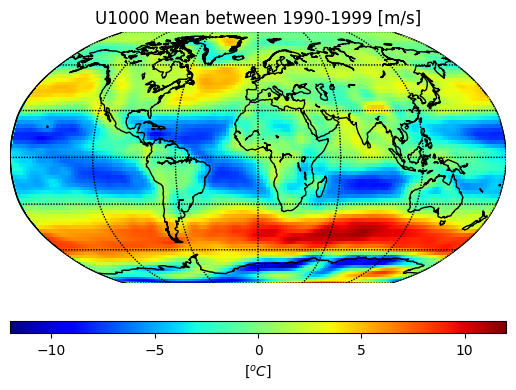

In [ ]:
[lons, lats] = meshgrid(lon,lat)

m = Basemap(projection='robin', lon_0=0)
m.drawcoastlines()

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='aqua')

minu = floor(np.min(u_10y[0]))
maxu = ceil(np.max(u_10y[0]))

h = m.pcolormesh(lons, lats, u_10y[0], shading='auto',latlon=True, cmap='jet', vmin=minu, vmax=maxu)
m.colorbar(h, location='bottom', pad="15%", label='[$^oC$]')


plt.title('U1000 Mean between 1990-1999 [m/s]')

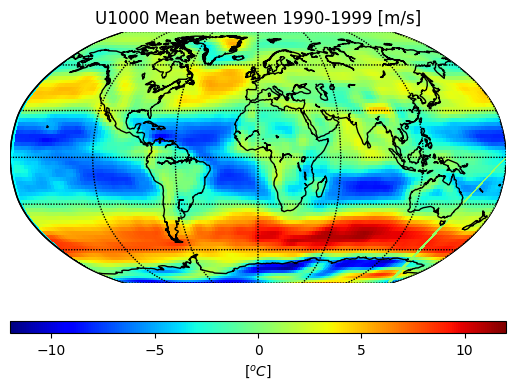

In [ ]:
#using flat colouring
from numpy import meshgrid, floor, ceil

# Assume lon and lat are already defined and are of shape (144,) and (73,) respectively
# Create meshgrid of longitudes and latitudes
lons, lats = meshgrid(lon, lat)

# Create Basemap instance
m = Basemap(projection='robin', lon_0=0)
m.drawcoastlines()

# Draw parallels and meridians
m.drawparallels(np.arange(-90., 120., 30.))
m.drawmeridians(np.arange(0., 360., 60.))
m.drawmapboundary(fill_color='aqua')

# Calculate min and max for color scale
minu = floor(np.min(u_10y[0]))
maxu = ceil(np.max(u_10y[0]))

# Adjust lons and lats to match the shape requirements
# Add extra row and column to lons and lats for pcolormesh
lons_adjusted = np.zeros((lons.shape[0] + 1, lons.shape[1] + 1))
lats_adjusted = np.zeros((lats.shape[0] + 1, lats.shape[1] + 1))

# Fill adjusted arrays
lons_adjusted[:-1, :-1] = lons
lats_adjusted[:-1, :-1] = lats

# Fill the last row and last column with NaN or appropriate values
lons_adjusted[-1, :-1] = lons_adjusted[-2, :-1]  # Copy last row
lats_adjusted[-1, :-1] = lats_adjusted[-2, :-1]  # Copy last row
lons_adjusted[:-1, -1] = lons_adjusted[:-1, -2]  # Copy last column
lats_adjusted[:-1, -1] = lats_adjusted[:-1, -2]  # Copy last column

# Use adjusted arrays for pcolormesh
h = m.pcolormesh(lons_adjusted, lats_adjusted, u_10y[0], shading='flat', latlon=True, cmap='jet', vmin=minu, vmax=maxu)

# Add colorbar
m.colorbar(h, location='bottom', pad="15%", label='[$^oC$]')

# Set the title
plt.title('U1000 Mean between 1990-1999 [m/s]')
plt.show()

<ipython-input-105-3ee2bc9c5a7a>:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  h = m.pcolormesh(lons, lats, u_10y_std[0], shading='auto',latlon=True, cmap='jet', vmin=minu, vmax=maxu)


Text(0.5, 1.0, 'U1000 STD between 1990-1999 [m/s]')

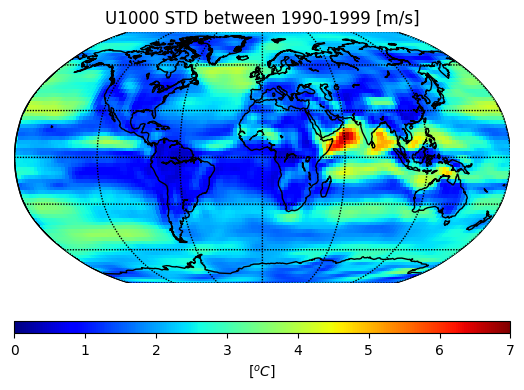

In [ ]:
[lons, lats] = meshgrid(lon,lat)

m = Basemap(projection='robin', lon_0=0)
m.drawcoastlines()

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='aqua')

minu = floor(np.min(u_10y_std[0]))
maxu = ceil(np.max(u_10y_std[0]))

h = m.pcolormesh(lons, lats, u_10y_std[0], shading='auto',latlon=True, cmap='jet', vmin=minu, vmax=maxu)
m.colorbar(h, location='bottom', pad="15%", label='[$^oC$]')

plt.title('U1000 STD between 1990-1999 [m/s]')